# Les packages nécessaires

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [27]:
CDM_data=pd.read_csv("new_Base_CDM.csv",sep=";",header=1)
CDM_data_balanced=pd.read_csv("new_Base_CDM_balanced_V2.csv",sep=";",header=1)

In [28]:
CDM_data.head()

,Display,cor_sales_in_vol,cor_sales_in_val,turnover,value,ENSEIGNE,VenteConv,Feature
0,No_Displ,11.0,35.21,19622,8,MONOPRIX,88.0,No_Feat
1,No_Displ,3.0,13.32,19622,12,MONOPRIX,36.0,No_Feat
2,No_Displ,6.0,8.10,19622,5,MONOPRIX,30.0,No_Feat
3,No_Displ,13.0,19.35,19622,8,MONOPRIX,104.0,No_Feat
4,No_Displ,13.0,90.09,19622,28,MONOPRIX,364.0,Feat


In [29]:
CDM_data.shape

(200737, 8)

In [30]:
CDM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200737 entries, 0 to 200736
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Display           200737 non-null  object 
 1   cor_sales_in_vol  200737 non-null  float64
 2   cor_sales_in_val  200737 non-null  float64
 3   turnover          200737 non-null  int64  
 4   value             200737 non-null  int64  
 5   ENSEIGNE          200737 non-null  object 
 6   VenteConv         200737 non-null  float64
 7   Feature           200737 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 12.3+ MB


In [31]:
plt.rcParams.update({'font.size':16})

<AxesSubplot:title={'center':'Distribution of magazine by Display'}, xlabel='Display'>

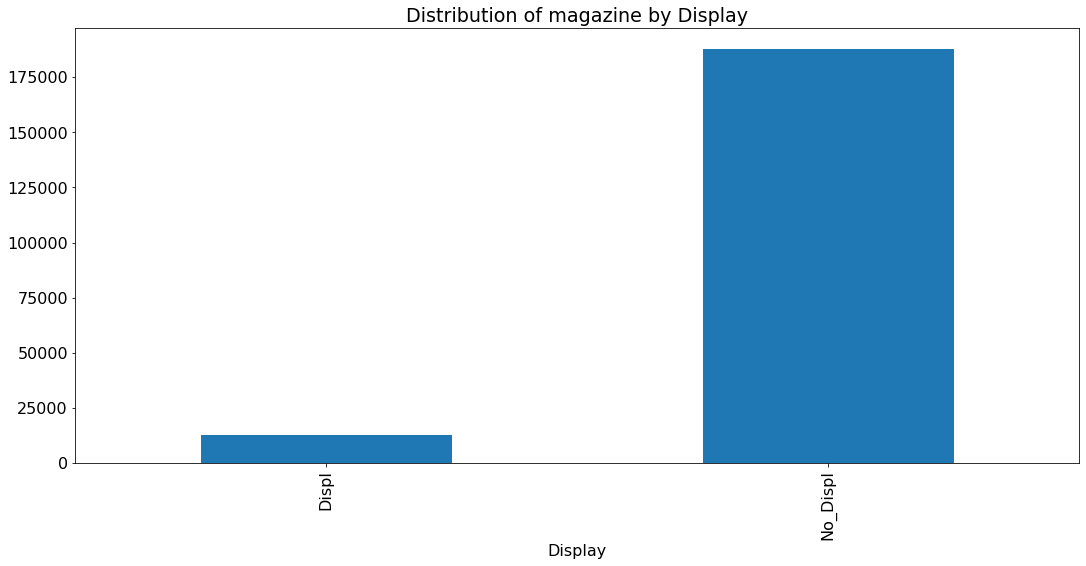

In [32]:
CDM_data.groupby("Display").count()["Feature"].plot(kind="bar",figsize=(18,8),title="Distribution of magazine by Display")

<AxesSubplot:title={'center':'Distribution by type of Enseigne'}, xlabel='ENSEIGNE'>

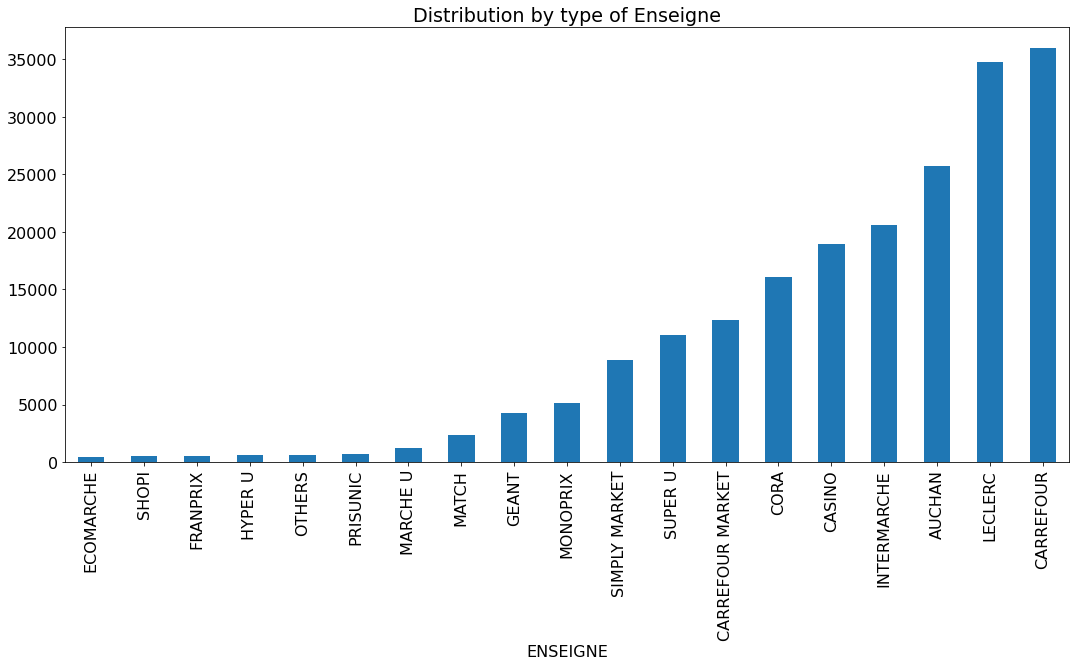

In [33]:
CDM_data.groupby("ENSEIGNE").count()["Display"].sort_values().plot(kind="bar",figsize=(18,8),title="Distribution by type of Enseigne")

<AxesSubplot:title={'center':'Distribution by feature'}, xlabel='Feature'>

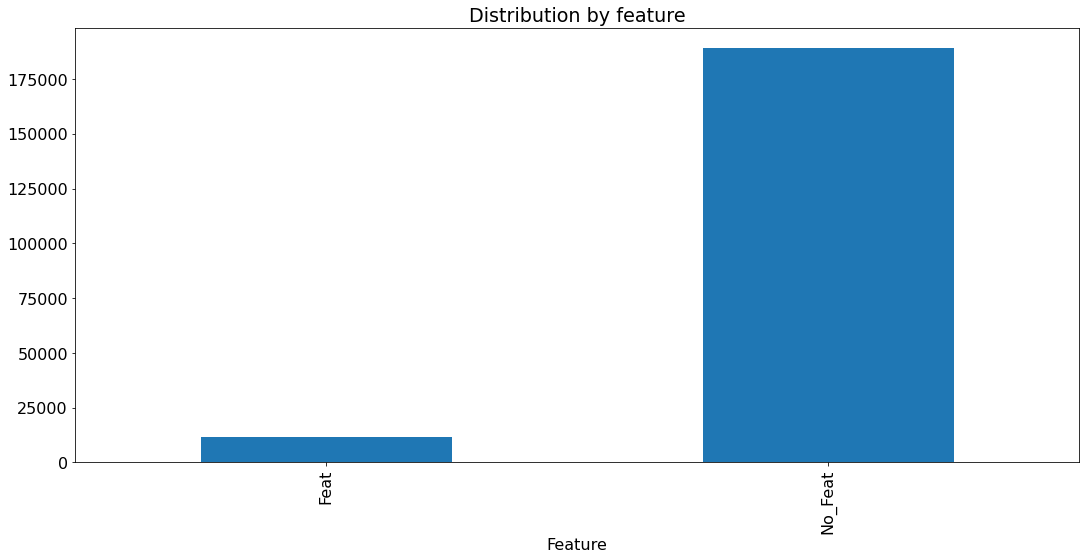

In [34]:
CDM_data.groupby("Feature").count()["Display"].plot(kind="bar",figsize=(18,8),title="Distribution by feature")

<AxesSubplot:ylabel='Frequency'>

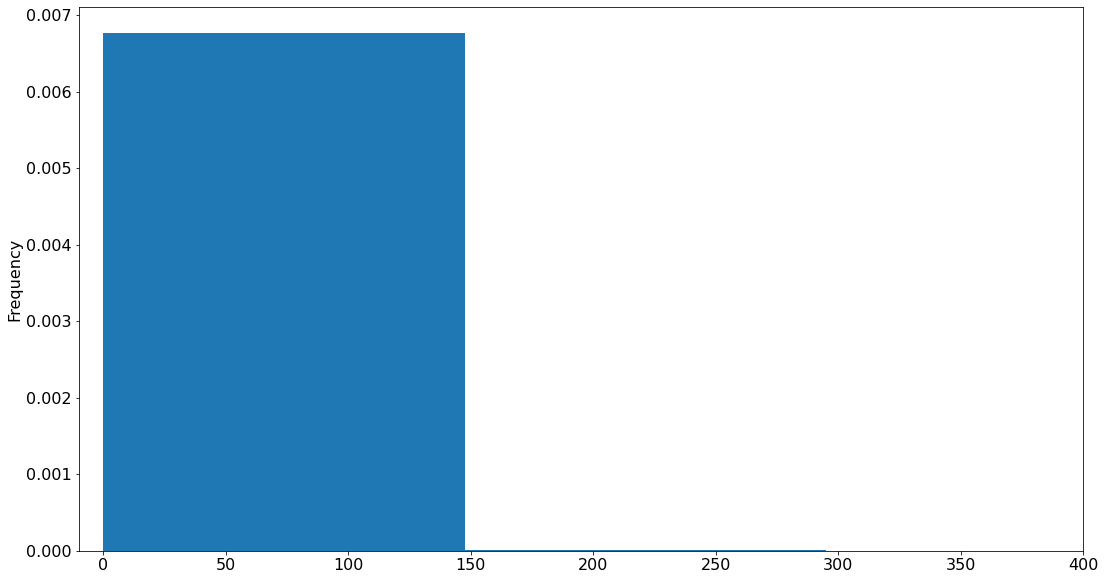

In [35]:
CDM_data['cor_sales_in_vol'].plot(kind="hist",figsize=(18,10),density=True,xlim=[-10,400])
#plt.axes(xlim=[0,1000])

<AxesSubplot:ylabel='Frequency'>

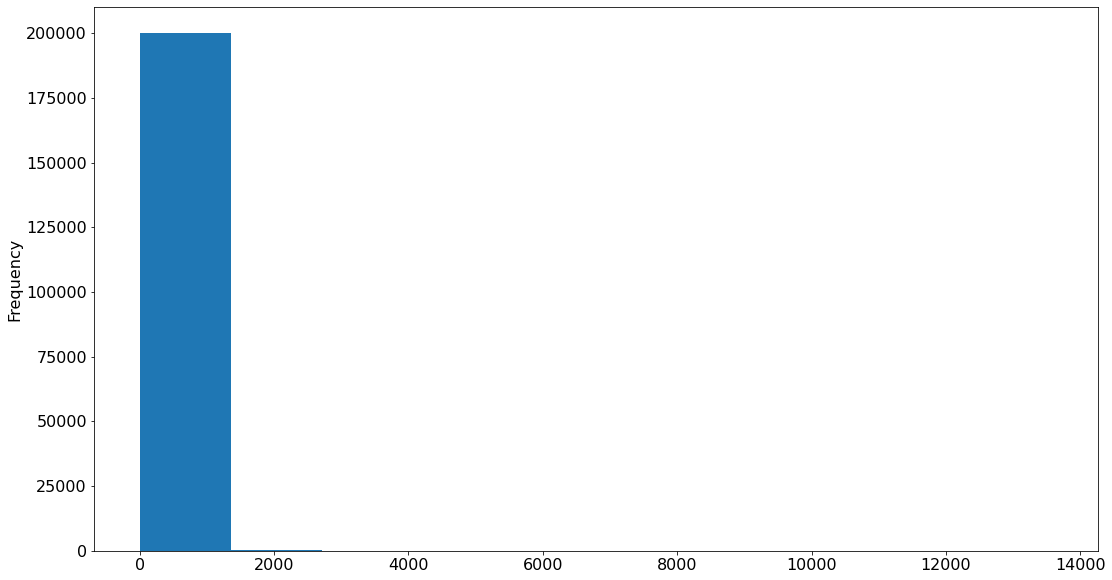

In [36]:
CDM_data['cor_sales_in_val'].plot(kind="hist",figsize=(18,10))

<AxesSubplot:title={'center':'Distribution of turnover'}, ylabel='Frequency'>

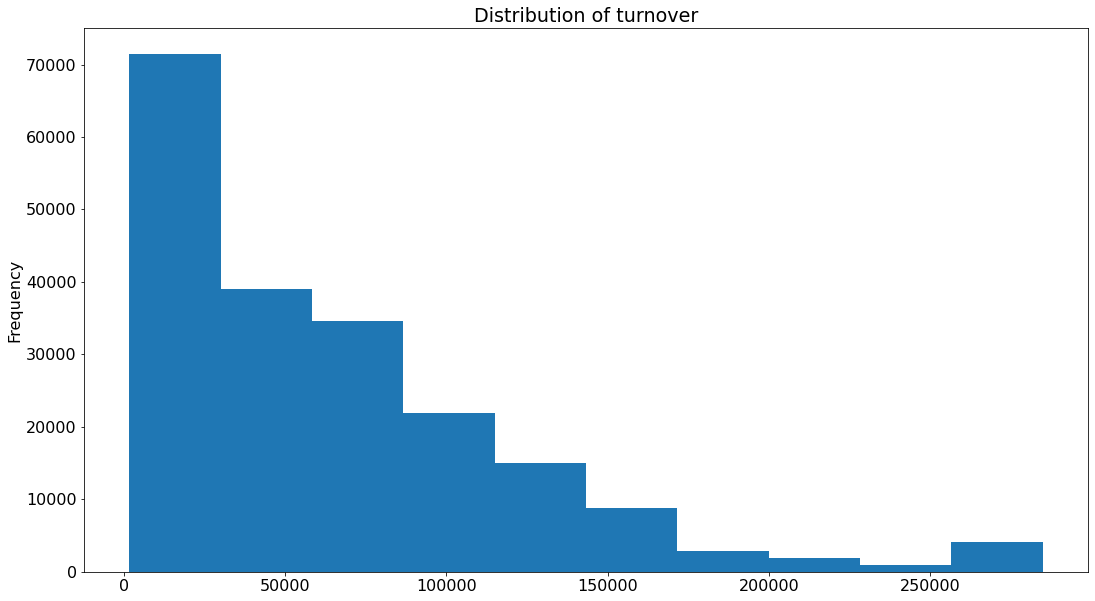

In [37]:
CDM_data['turnover'].plot(kind="hist",figsize=(18,10),title="Distribution of turnover")

<AxesSubplot:title={'center':'Distribution of value'}, ylabel='Frequency'>

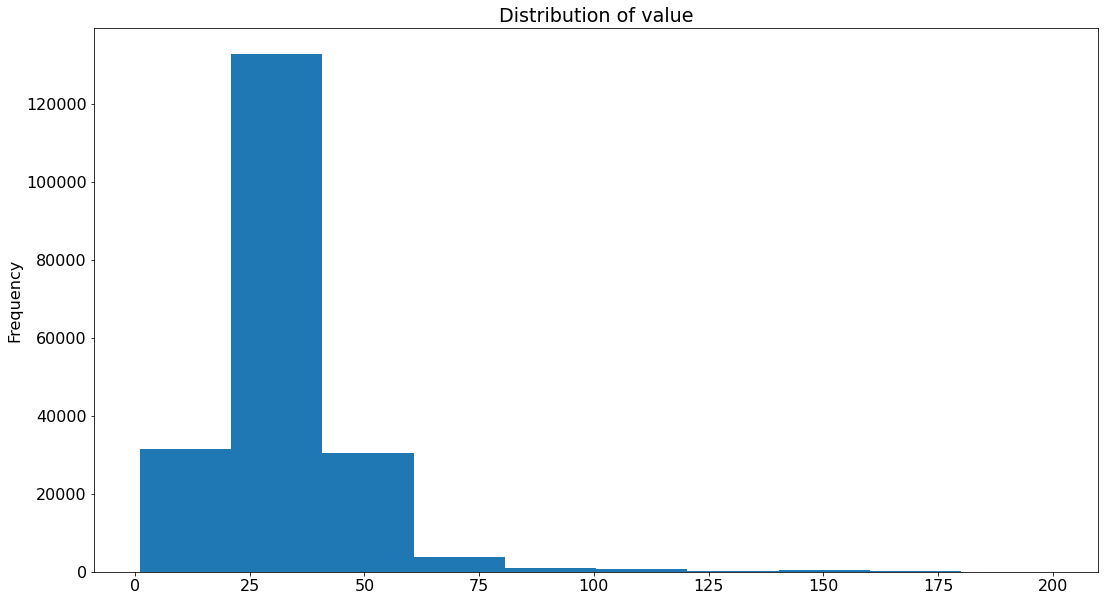

In [38]:
CDM_data['value'].plot(kind="hist",figsize=(18,10),title="Distribution of value")

<AxesSubplot:title={'center':'Distribution of VenteConv'}, ylabel='Frequency'>

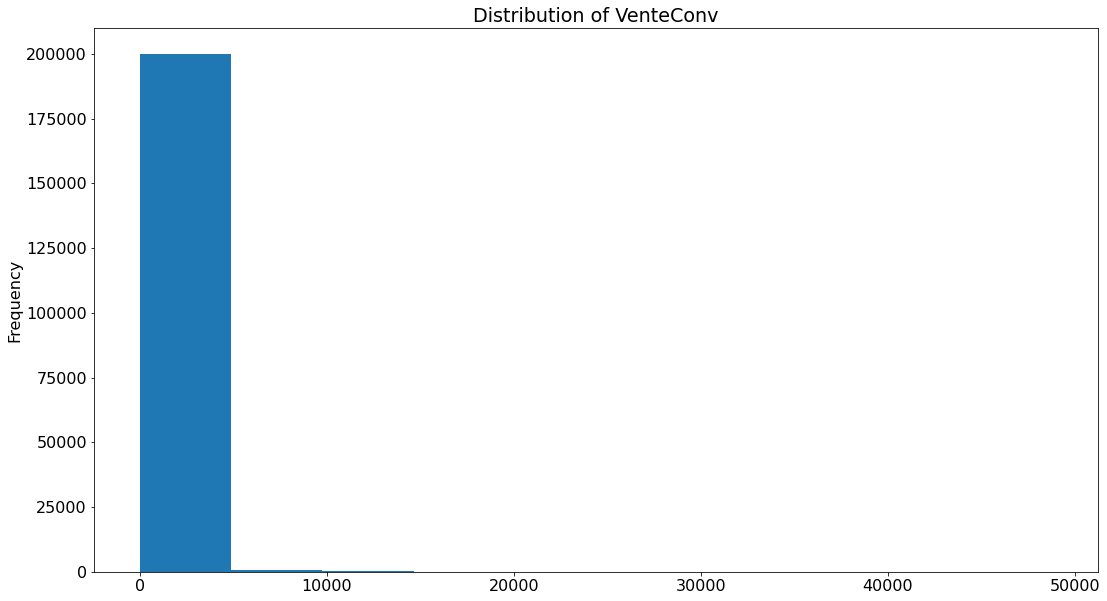

In [39]:
CDM_data["VenteConv"].plot(kind="hist",figsize=(18,10),title="Distribution of VenteConv")

<AxesSubplot:>

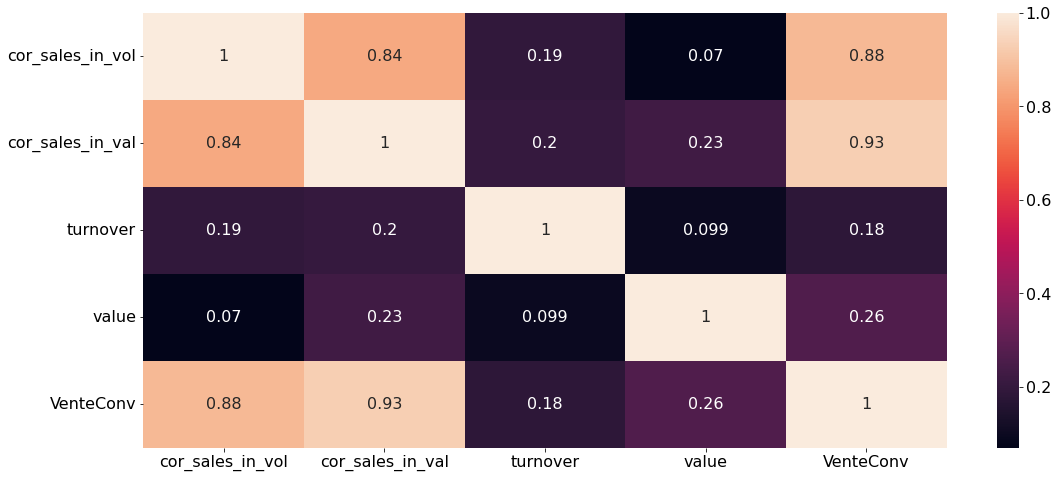

In [40]:
corr=CDM_data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr,annot=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
cate_col=['Display','ENSEIGNE','Feature']

In [43]:
labelencoder=LabelEncoder()
for col in cate_col:
    CDM_data[col]=labelencoder.fit_transform(CDM_data[col])

# Pour balanced data

labelencoder=LabelEncoder()
for col in cate_col:
    CDM_data_balanced[col]=labelencoder.fit_transform(CDM_data_balanced[col])

In [44]:
CDM_data.head()

,Display,cor_sales_in_vol,cor_sales_in_val,turnover,value,ENSEIGNE,VenteConv,Feature
0,1,11.0,35.21,19622,8,13,88.0,1
1,1,3.0,13.32,19622,12,13,36.0,1
2,1,6.0,8.10,19622,5,13,30.0,1
3,1,13.0,19.35,19622,8,13,104.0,1
4,1,13.0,90.09,19622,28,13,364.0,0


<AxesSubplot:>

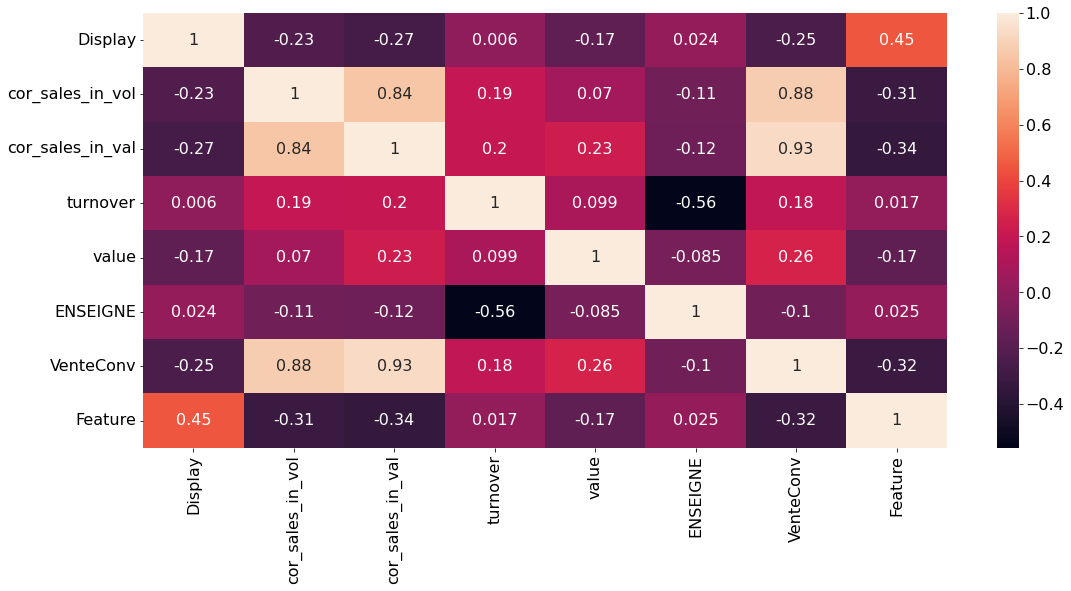

In [45]:
new_corr=CDM_data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(new_corr,annot=True)

# Modelisation

In [46]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix, roc_curve,auc
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

## Division des données

In [65]:
X=CDM_data.iloc[:,1:]
y=CDM_data['Display']

#Pour balanced

X_b=CDM_data_balanced.iloc[:,1:]
y_b=CDM_data_balanced['Display']

In [48]:
X_t,X_valid,y_t,y_valid=train_test_split(X,y,train_size=0.85)

X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,train_size=0.8)

#Pour balanced
X_t_b,X_valid_b,y_t_b,y_valid_b=train_test_split(X_b,y_b,train_size=0.85)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_t_b,y_t_b,train_size=0.8)

<AxesSubplot:>

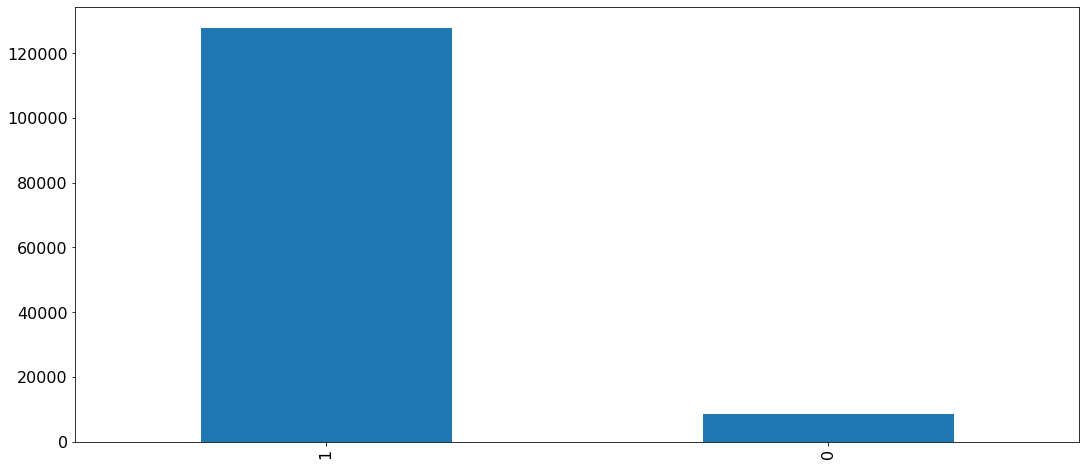

In [49]:
y_train.value_counts().plot(kind="bar",figsize=(18,8))

<AxesSubplot:>

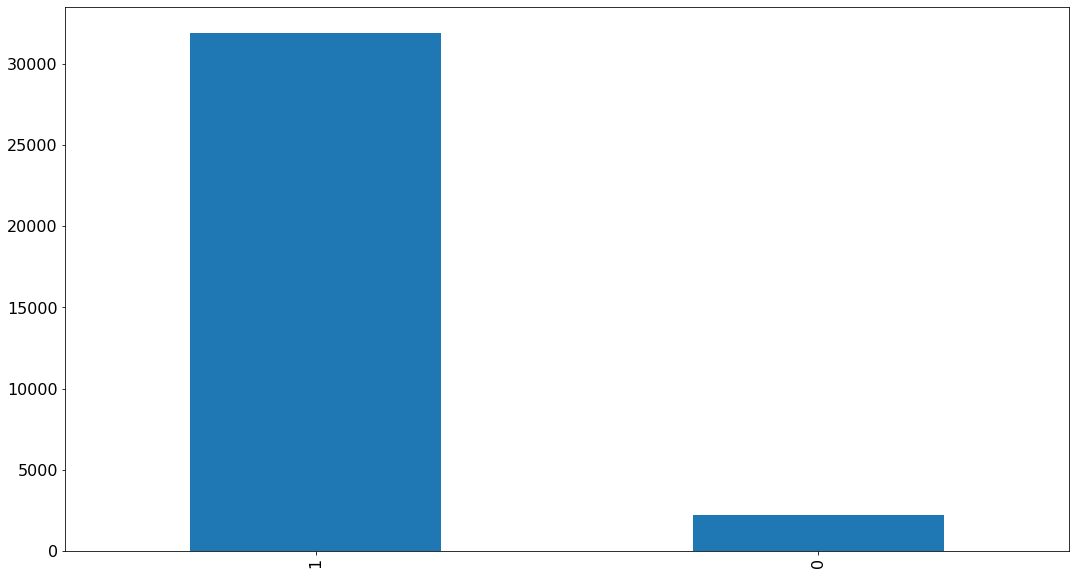

In [50]:
y_test.value_counts().plot(kind="bar",figsize=(18,10))

Nous voyons une sous répresentation de la classe contenant le caractère `Display`

## - RandomForestClassifier

In [ ]:
randomforest_unb=RandomForestClassifier().fit(X_train,y_train)
randomforest_b=RandomForestClassifier().fit(X_train_b,y_train_b)

In [ ]:
print("Score d'adjustement de unbalanced data model:", randomforest_unb.score(X_train,y_train))
print("Score d'adjustement de balanced data model:", randomforest_b.score(X_train_b,y_train_b))

In [ ]:
y_predict_forest=randomforest_unb.predict(X_test)
y_predict_forest_b=randomforest_b.predict(X_test_b)

In [ ]:
print(classification_report(y_test,y_predict_forest))
print(classification_report(y_test_b,y_predict_forest_b))
print("=="*54)
plt.figure(figsize=(18,10))
sns.heatmap(confusion_matrix(y_test,y_predict_forest),annot=True,fmt='d')

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(confusion_matrix(y_test_b,y_predict_forest_b),annot=True,fmt='d')

In [ ]:

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict_proba = randomforest.predict_proba(X.iloc[index])[:,1]
    y_predict_class = randomforest.predict(X.iloc[index])
    print(classification_report(y.iloc[index], y_predict_class))
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict_proba)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
recall, accuracy, precision = [], [], []

randomforest=RandomForestClassifier()    

for (train, test), i in zip(cv.split(X, y), range(5)):
    randomforest=randomforest.fit(X.iloc[train], y.iloc[train])
   # _, _, auc_score_train = compute_roc_auc(train)
    #fpr, tpr, auc_score = compute_roc_auc(test)
   # scores.append((auc_score_train, auc_score))
    #fprs.append(fpr)
    #tprs.append(tpr)

In [ ]:
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [ ]:
predict_forest=randomforest.predict(X_valid_b)

#y_predict_forest=randomforest_unb.predict(X_test)
y_predict_forest_b=randomforest_b.predict(X_valid_b)

print(classification_report(y_valid_b,predict_forest))
print(classification_report(y_valid_b,y_predict_forest_b))

## LDA:

In [76]:
X_t,X_valid,y_t,y_valid=train_test_split(X,y,train_size=0.85)

X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,train_size=0.8)

#Pour balanced
X_t_b,X_valid_b,y_t_b,y_valid_b=train_test_split(X_b,y_b,train_size=0.85)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_t_b,y_t_b,train_size=0.8)

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

#Train the model using the training sets
lda_unb=clf.fit(X_train, y_train)
lda_b=clf.fit(X_train_b,y_train_b)

In [78]:
print("Score d'adjustement de unbalanced data model:", lda_unb.score(X_train,y_train))
print("Score d'adjustement de balanced data model:", lda_b.score(X_train_b,y_train_b))

Score d'adjustement de unbalanced data model: 0.9338681318681319
Score d'adjustement de balanced data model: 0.7385203354058525


In [80]:
y_predict_lda_unb=lda_unb.predict(X_test)
y_predict_lda_b=lda_b.predict(X_test)

In [81]:
print("=="*10+"For unbalanced data"+"=="*10)
print(classification_report(y_test,y_predict_lda_unb))
print("=="*10+"For balanced data"+"=="*10)
print(classification_report(y_test,y_predict_lda_b))

====================For unbalanced data====================
              precision    recall  f1-score   support

           0       0.46      0.50      0.48      2127
           1       0.97      0.96      0.96     31999

    accuracy                           0.93     34126
   macro avg       0.72      0.73      0.72     34126
weighted avg       0.94      0.93      0.93     34126

====================For balanced data====================
              precision    recall  f1-score   support

           0       0.46      0.50      0.48      2127
           1       0.97      0.96      0.96     31999

    accuracy                           0.93     34126
   macro avg       0.72      0.73      0.72     34126
weighted avg       0.94      0.93      0.93     34126



<AxesSubplot:title={'center':'For unbalanced data model'}>

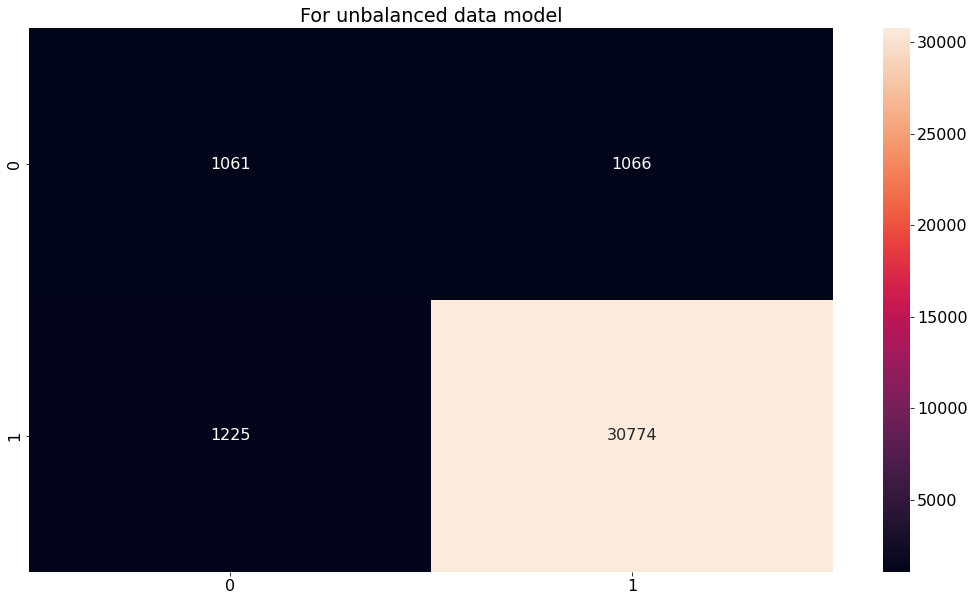

In [82]:
plt.figure(figsize=(18,10))
plt.title("For unbalanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_lda_unb),annot=True,fmt='d')

<AxesSubplot:title={'center':'For balanced data model'}>

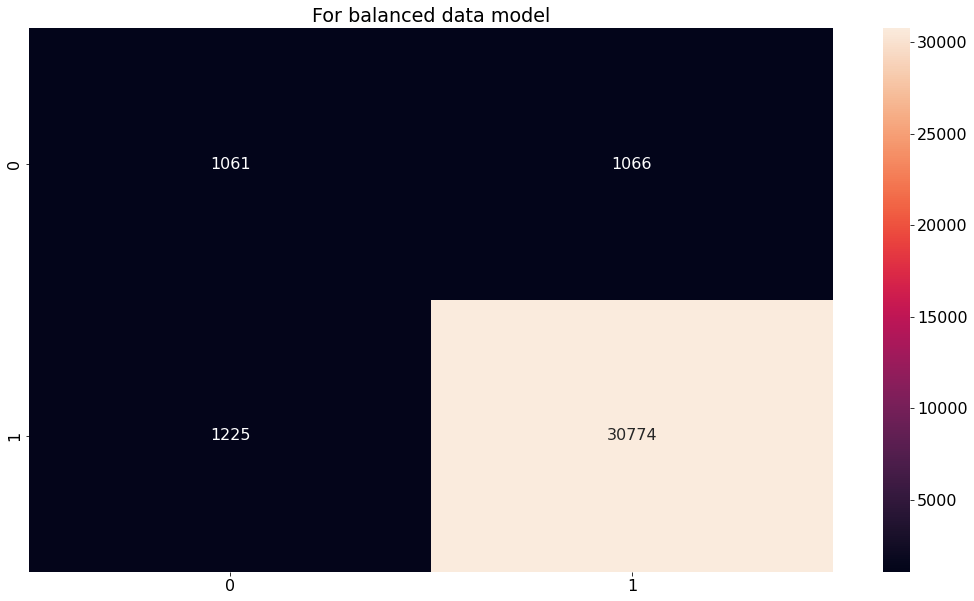

In [83]:
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_lda_b),annot=True,fmt='d')

In [84]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

for (train, test), i in zip(cv.split(X_train, y_train), range(5)):
    lda=clf.fit(X.iloc[train], y.iloc[train])

In [86]:
y_predict_lda_kf=lda.predict(X_valid_b)
y_predict_lda_b=lda_b.predict(X_valid_b)

print("=="*20+"For unbalanced data model with StratiefKfold"+"=="*20)
print(classification_report(y_valid_b,y_predict_lda_kf))

print("=="*20+"For balanced data model"+"=="*20)
print(classification_report(y_valid_b,y_predict_lda_b))

========================================For unbalanced data model with StratiefKfold========================================
              precision    recall  f1-score   support

           0       0.94      0.47      0.62      1891
           1       0.66      0.97      0.78      1977

    accuracy                           0.72      3868
   macro avg       0.80      0.72      0.70      3868
weighted avg       0.80      0.72      0.71      3868

========================================For balanced data model========================================
              precision    recall  f1-score   support

           0       0.94      0.47      0.62      1891
           1       0.66      0.97      0.78      1977

    accuracy                           0.72      3868
   macro avg       0.80      0.72      0.70      3868
weighted avg       0.80      0.72      0.71      3868



<AxesSubplot:title={'center':'For unbalanced data model with StratifiedKFold sampling methods'}>

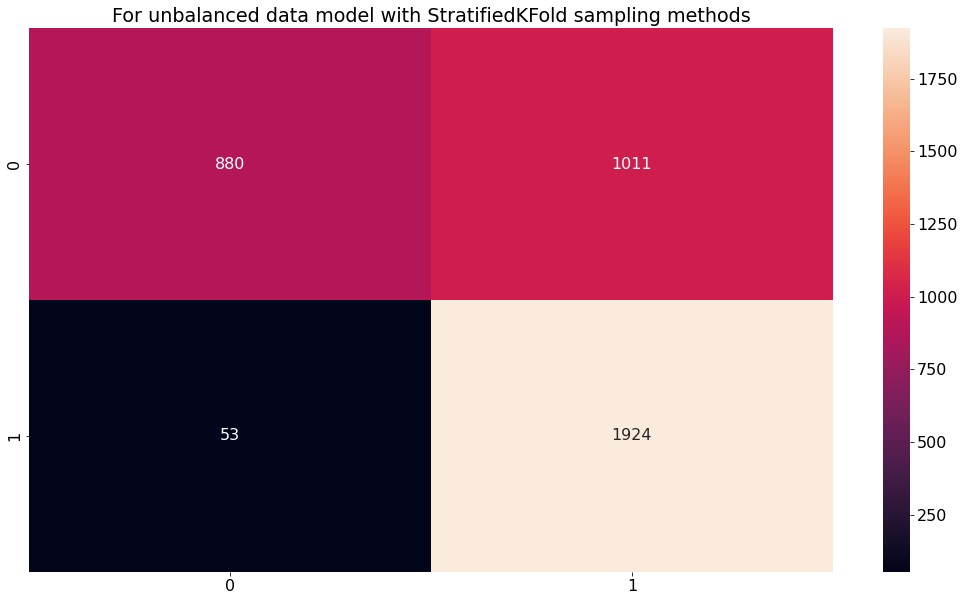

In [87]:
plt.figure(figsize=(18,10))
plt.title("For unbalanced data model with StratifiedKFold sampling methods")
sns.heatmap(confusion_matrix(y_valid_b,y_predict_lda_kf),annot=True,fmt='d')

<AxesSubplot:title={'center':'For balanced data model'}>

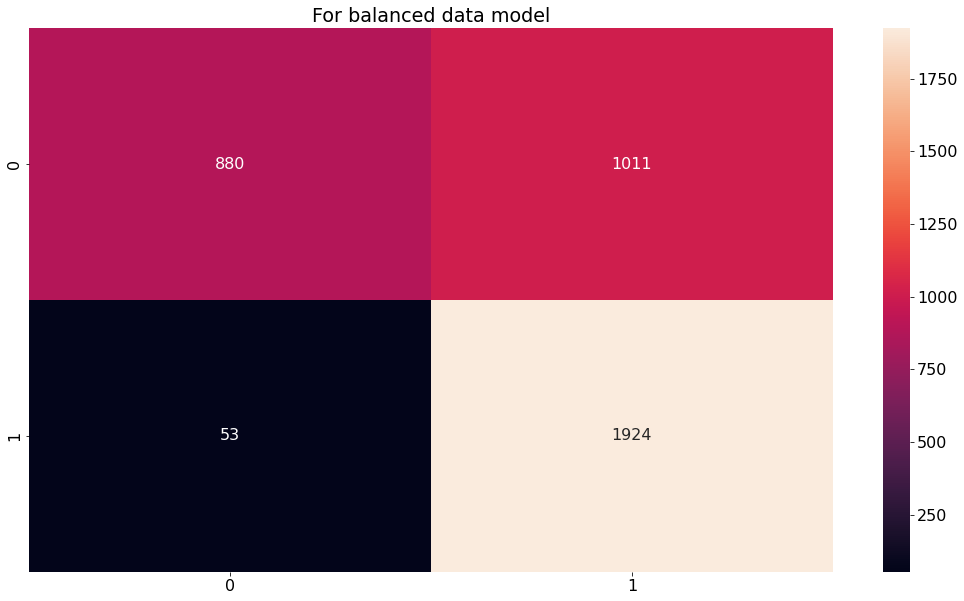

In [88]:
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_valid_b,y_predict_lda_b),annot=True,fmt='d')

In [89]:
y_predict_lda_kf_unb2=lda.predict(X_valid)
y_predict_lda_unb2=lda_b.predict(X_valid)

print("=="*10+"For unbalanced data model with StratiefKfold"+"=="*10)
print(classification_report(y_valid,y_predict_lda_kf_unb2))

print("=="*10+"Balanced data model on unbalanced unknown data"+"=="*10)
print(classification_report(y_valid,y_predict_lda_unb2))

====================For unbalanced data model with StratiefKfold====================
              precision    recall  f1-score   support

           0       0.52      0.47      0.50      2018
           1       0.96      0.97      0.97     28093

    accuracy                           0.94     30111
   macro avg       0.74      0.72      0.73     30111
weighted avg       0.93      0.94      0.93     30111

====================Balanced data model on unbalanced unknown data====================
              precision    recall  f1-score   support

           0       0.52      0.47      0.50      2018
           1       0.96      0.97      0.97     28093

    accuracy                           0.94     30111
   macro avg       0.74      0.72      0.73     30111
weighted avg       0.93      0.94      0.93     30111



<AxesSubplot:title={'center':'For unbalanced data model with StratifiedKFold sampling methods'}>

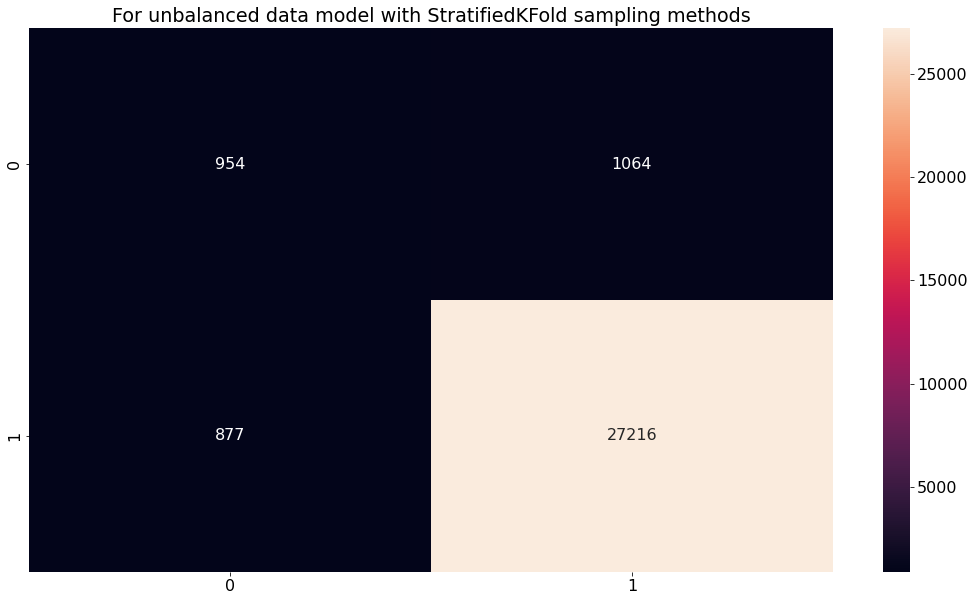

In [90]:
plt.figure(figsize=(18,10))
plt.title("For unbalanced data model with StratifiedKFold sampling methods")
sns.heatmap(confusion_matrix(y_valid,y_predict_lda_kf_unb2),annot=True,fmt='d')

<AxesSubplot:title={'center':'For balanced data model'}>

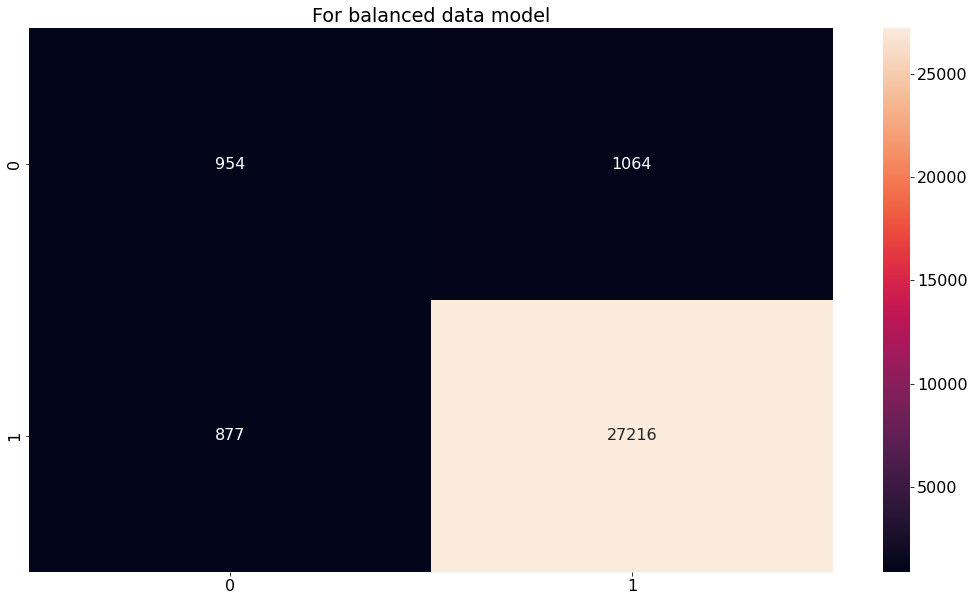

In [91]:
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_valid,y_predict_lda_unb2),annot=True,fmt='d')

In [68]:
print("Score d'adjustement de unbalanced data model:", lda_unb.score(X_train,y_train))
print("Score d'adjustement de balanced data model:", lda_b.score(X_train_b,y_train_b))

Score d'adjustement de unbalanced data model: 0.9336703296703297
Score d'adjustement de balanced data model: 0.7387485026524443


In [69]:
y_predict_lda_unb=lda_unb.predict(X_test)
y_predict_lda_b=lda_b.predict(X_test)

In [70]:
print("=="*10+"For unbalanced data"+"=="*10)
print(classification_report(y_test,y_predict_lda_unb))
print("=="*10+"For balanced data"+"=="*10)
print(classification_report(y_test,y_predict_lda_b))

====================For unbalanced data====================
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      2191
           1       0.97      0.96      0.96     31935

    accuracy                           0.93     34126
   macro avg       0.73      0.74      0.73     34126
weighted avg       0.94      0.93      0.93     34126

====================For balanced data====================
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      2191
           1       0.97      0.96      0.96     31935

    accuracy                           0.93     34126
   macro avg       0.73      0.74      0.73     34126
weighted avg       0.94      0.93      0.93     34126



<AxesSubplot:title={'center':'For unbalanced data model'}>

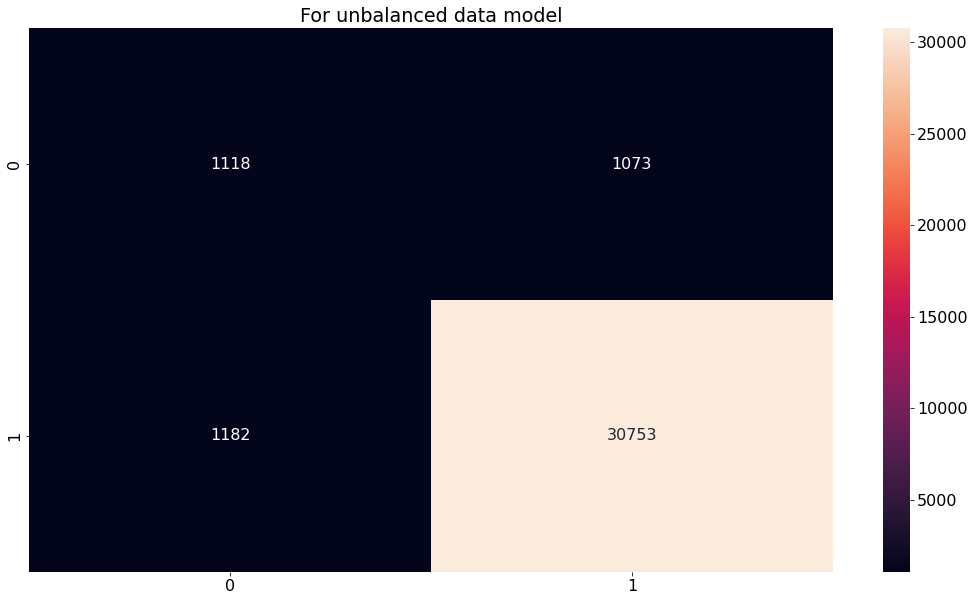

In [71]:
plt.figure(figsize=(18,10))
plt.title("For unbalanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_lda_unb),annot=True,fmt='d')

<AxesSubplot:title={'center':'For balanced data model'}>

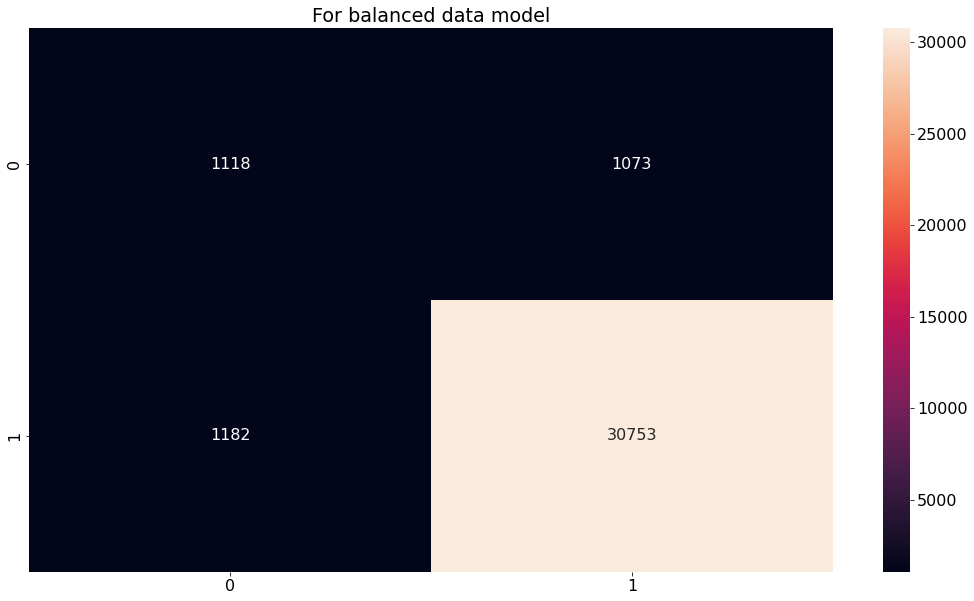

In [75]:
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_lda_b),annot=True,fmt='d')

In [72]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

lda=LinearDiscriminantAnalysis()  

for (train, test), i in zip(cv.split(X_train, y_train), range(5)):
    lda_kfold=lda.fit(X_train.iloc[train], y_train.iloc[train])

              precision    recall  f1-score   support

           0       0.49      0.51      0.50      2174
           1       0.97      0.96      0.97     31952

    accuracy                           0.93     34126
   macro avg       0.73      0.74      0.73     34126
weighted avg       0.94      0.93      0.94     34126

              precision    recall  f1-score   support

           0       0.93      0.50      0.65      2194
           1       0.66      0.96      0.78      2189

    accuracy                           0.73      4383
   macro avg       0.79      0.73      0.71      4383
weighted avg       0.79      0.73      0.71      4383



<AxesSubplot:>

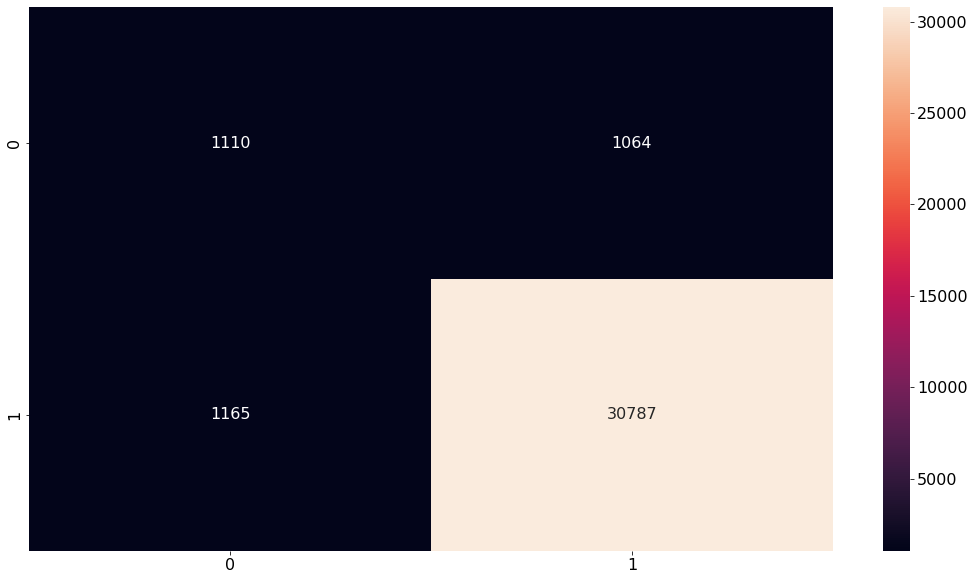

In [30]:
print(classification_report(y_test,y_predict_lda))
print(classification_report(y_test_b,y_predict_lda_b))
print("=="*54)
plt.figure(figsize=(18,10))
sns.heatmap(confusion_matrix(y_test,y_predict_lda),annot=True,fmt='d')

<AxesSubplot:>

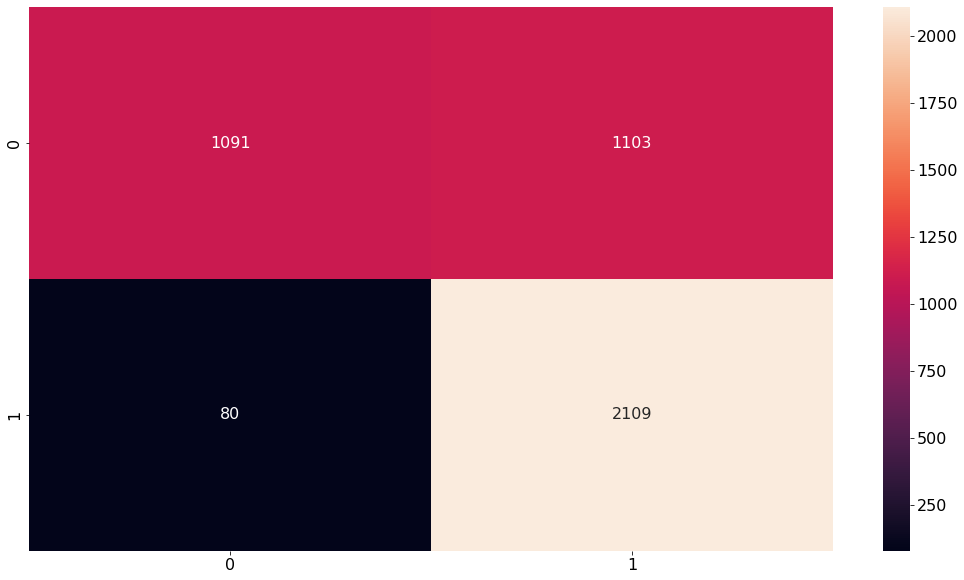

In [31]:
plt.figure(figsize=(18,10))
sns.heatmap(confusion_matrix(y_test_b,y_predict_lda_b),annot=True,fmt='d')

In [ ]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(n_jobs=-1)
svm_unb=classifier.fit(X_train,y_train)


In [26]:
print("Score d'adjustement de unbalanced data model:", svm_unb.score(X_train,y_train))
print("Score d'adjustement de balanced data model:", svm_b.score(X_train_b,y_train_b))

NameError: name 'randomforest_unb' is not defined

In [ ]:
y_predict_svm=svm_unb.predict(X_test)
y_predict_svm_b=svm_b.predict(X_test_b)

In [ ]:
print(classification_report(y_test,y_predict_svm))
print(classification_report(y_test_b,y_predict_svm_b))
print("=="*54)
plt.figure(figsize=(18,10))
sns.heatmap(confusion_matrix(y_test,y_predict_svm),annot=True,fmt='d')

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(confusion_matrix(y_test_b,y_predict_svm_b),annot=True,fmt='d')

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
recall, accuracy, precision = [], [], []

randomforest=RandomForestClassifier()    

for (train, test), i in zip(cv.split(X, y), range(5)):
    randomforest=randomforest.fit(X.iloc[train], y.iloc[train])

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [ ]:
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [ ]:
predict_forest=randomforest.predict(X_valid_b)

#y_predict_forest=randomforest_unb.predict(X_test)
y_predict_forest_b=randomforest_b.predict(X_valid_b)

print(classification_report(y_valid_b,predict_forest))
print(classification_report(y_valid_b,y_predict_forest_b))

In [ ]:
print("=="*54)
plt.figure(figsize=(18,10))
sns.heatmap(confusion_matrix(y_test,predict_forest),annot=True,fmt='d')